In [1]:
import sys
# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC


import pickle as pkl
import sys


import dataprocess as dp

In [ ]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/neo_data_copy.csv') 
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).rus()
df.head()

In [5]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/neo_data_copy.csv') 
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).rus()
df.head()

,is_hazardous,absolute_magnitude_h,relative_velocity.kilometers_per_hour,miss_distance.kilometers,orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,eccentricity,semi_major_axis,inclination,ascending_node_longitude,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly
0,0,26.91,28183.2262176706,1338996.724016161,7.0,0.010087,3.609,0.509392,2.052460,6.686945,191.728677,1.006954,170.486178,3.097967,2.460215e+06,129.292041
1,0,25.82,32738.0262647721,22194554.396867284,6.0,0.001913,4.541,0.447136,1.446095,2.255558,224.534268,0.799494,109.146094,2.092696,2.460842e+06,223.250515
2,0,28.44,28749.3011604989,15141658.306645302,6.0,0.006157,5.818,0.150310,1.054296,7.286439,144.437341,0.895825,283.787815,1.212767,2.460714e+06,256.644877
3,0,23.26,23279.7304638839,65208239.205723247,4.0,0.187817,4.899,0.105311,1.335560,5.624949,227.900859,1.194911,29.076729,1.476209,2.460488e+06,71.799228
4,0,23.14,81474.3102856586,63946287.135052165,5.0,0.083318,3.119,0.607917,2.588083,8.093767,210.785321,1.014742,127.341872,4.161424,2.460192e+06,96.725440


In [3]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/nearest-earth-objects(1910-2024).csv')

df.drop(columns=['neo_id', 'orbiting_body', 'name'], inplace=True)
le = LabelEncoder()
df['is_hazardous'] = le.fit_transform(df['is_hazardous'])
df = df.dropna()
df = dp.OverallProcessor(df).rus()
df.shape


(86324, 6)

In [6]:
df_target = df['is_hazardous']
df_target_array = df_target.values
df_features = df.drop(columns=['is_hazardous'])
df_features_array = df_features.values

# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
# ])
# preprocess = ColumnTransformer([
#     ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
# ])

preprocess = ColumnTransformer([
    ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
])


pipeline = Pipeline([
    ('preprocess', preprocess)])

df_preprocessed = pipeline.fit_transform(df)
df_preprocessed

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_target_array, test_size=0.2)

sss = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=42)

for train_index, sample_index in sss.split(X_train, y_train):
    X_train_sample = X_train[sample_index]
    y_train_sample = y_train[sample_index]


In [7]:
X_train_sample.shape, y_train_sample.shape, X_test.shape, y_test.shape

((20000, 15), (20000,), (5020, 15), (5020,))

The accuracy score is 0.9384462151394423
 The recall score is 0.9070380127963868
 The f1 score is 0.939754338077598
 The roc score is 0.9389901591704644

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.94      2548
           1       0.91      0.97      0.94      2472

    accuracy                           0.94      5020
   macro avg       0.94      0.94      0.94      5020
weighted avg       0.94      0.94      0.94      5020


Cross validation score: [0.72499663 0.72599664 0.73799581 0.72399558 0.73699579]

Mean cross validation score: 0.729996091692511



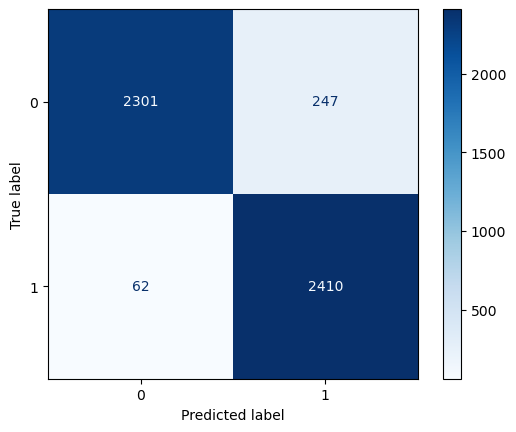

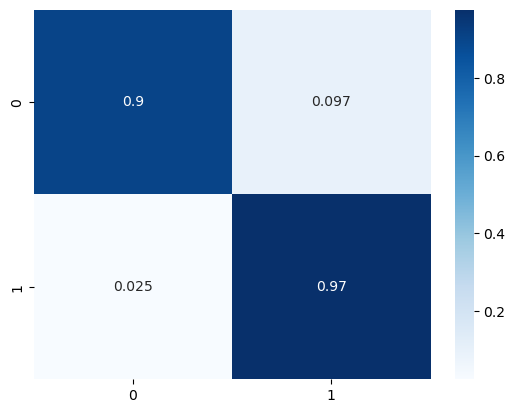

In [8]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.998207171314741
 The recall score is 0.9975757575757576
 The f1 score is 0.9981807155852032
 The roc score is 0.9982158098489583

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2548
           1       1.00      1.00      1.00      2472

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020


Cross validation score: [0.98999988 0.99299991 0.98299973 0.99299989 0.99299989]

Mean cross validation score: 0.9903998591479025



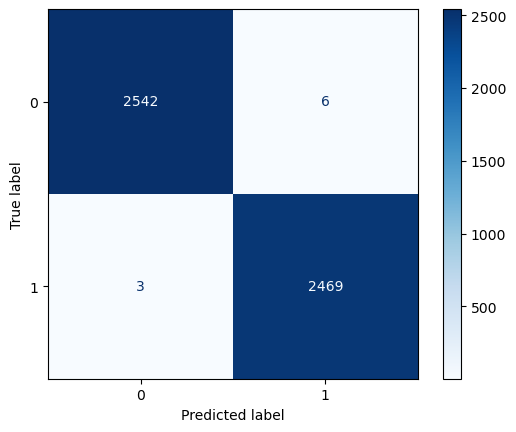

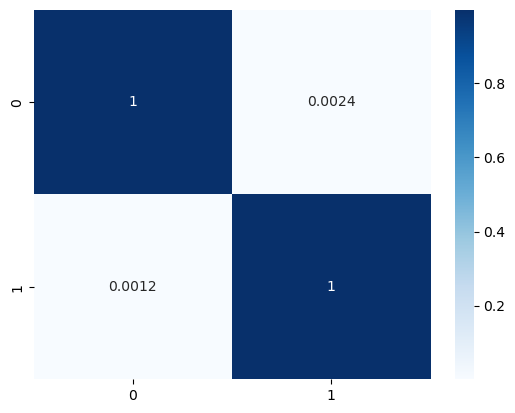

In [9]:
supportvm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

supportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The roc score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2548
           1       1.00      1.00      1.00      2472

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights

Cross validation score: [1.         1.         1.         0.99899998 1.        ]

Mean cross validation score: 0.9997999967999487



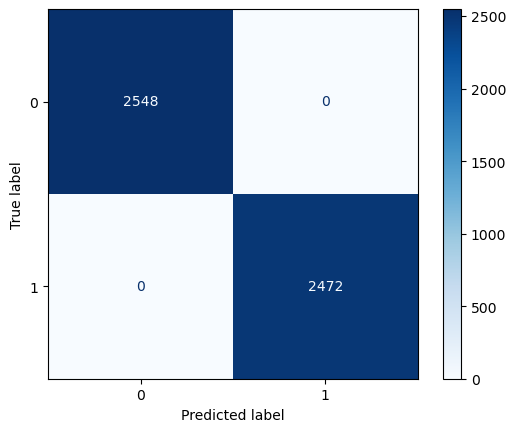

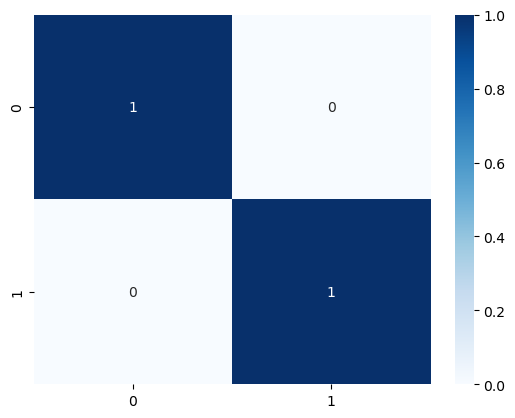

In [10]:
rndfrst = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

rndfrst.fit()